In [ ]:
# Download the data from Google Drive, and parse it to some Python lists
import gdown
import csv

def load_data_from_drive():
    
    edges = []
    gdown.download("https://drive.google.com/uc?id=1vBUOcQVh1EDY91xtW4fZjowbN8RFQ5Br", "interactions.txt", quiet=True)
    with open("interactions.txt") as f:
        c = csv.reader(f, delimiter="\t")
        for row in c:
            # TODO: Are weights minutes or what?
            edges.append(tuple(int(i) for i in row))

    people = []
    jobs = []
    gdown.download("https://drive.google.com/uc?id=10e8tFloUoUpV8UUf863blJBk8eTrSUih", "person_descriptions.txt", quiet=True)
    with open("person_descriptions.txt") as f:
        c = csv.reader(f, delimiter="\t")
        for row in c:
            print(row)
            people.append(int(row[0]))
            jobs.append(row[1])
    
    return edges, people, rows

load_data_from_drive()

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from copy import deepcopy
from random import choice
import pandas as pd
import numpy as np

In [63]:
class Graphs:
    def adjacent_edges(self, nodes, halfk):
        n = len(nodes)
        for i, u in enumerate(nodes):
            for j in range(i+1, i+halfk+1):
                v = nodes[j % n]
                yield u, v
    def make_ring_lattice(self, n, k):
        G = nx.Graph()
        nodes = range(n)
        G.add_nodes_from(nodes)
        G.add_edges_from(self.adjacent_edges(nodes, k//2))
        return G
    def make_ws_graph(self, n, k, p):
        def flip(p):
            return np.random.random() < p
        G = self.make_ring_lattice(n, k)
        nodes = set(G)
        for u, v in G.edges():
            if flip(p):
                choices = nodes - {u} - set(G[u])
                new_v = np.random.choice(list(choices))
                G.remove_edge(u, v)
                G.add_edge(u, new_v)
        return G    
    

In [84]:
class School(Graphs):
    def __init__(self, n=20, k = 4, p = .5):
        super()
        self.G = self.make_ws_graph(n, k, p)
        initialState= {"state": "susceptible"}
        attributes = {i:deepcopy(initialState) for i in self.G.nodes}
        nx.set_node_attributes(self.G, attributes)
    
    def expose(self, index):
        self.G.node[index]["state"] = "exposed"
        
    def infect(self, index):
        self.G.node[index]["state"] = "infectious"
        
    def recover(self, index):
        self.G.node[index]["state"] = "recovered"
        
    def get_colors(self):
        def color(state):
            if state == "susceptible":
                return "green"
            elif state == "exposed":
                return "yellow"
            if state == "infectious":
                return "red"
            if state == "recovered":
                return "blue"
        states = list([data["state"] for i, data in self.G.nodes(data=True)])
        return list(map(color, states))
    
    def visualize(self):
        nx.draw_networkx(self.G, 
                node_color=self.get_colors(), 
                node_size=500, 
                with_labels=True)
        for node in self.G.nodes(data=True):
            print(node)

In [88]:
S = School()
S.infect(0)

(0, {'state': 'infectious'})
(1, {'state': 'susceptible'})
(2, {'state': 'susceptible'})
(3, {'state': 'susceptible'})
(4, {'state': 'susceptible'})
(5, {'state': 'susceptible'})
(6, {'state': 'susceptible'})
(7, {'state': 'susceptible'})
(8, {'state': 'susceptible'})
(9, {'state': 'susceptible'})
(10, {'state': 'susceptible'})
(11, {'state': 'susceptible'})
(12, {'state': 'susceptible'})
(13, {'state': 'susceptible'})
(14, {'state': 'susceptible'})
(15, {'state': 'susceptible'})
(16, {'state': 'susceptible'})
(17, {'state': 'susceptible'})
(18, {'state': 'susceptible'})
(19, {'state': 'susceptible'})


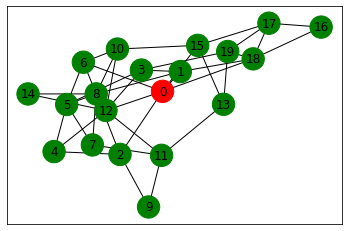

In [89]:
S.visualize()

['green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green']